In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mortgage import Mortgage
from mortgage import _style
from mortgage import table_multiple_down_payment_percents, table_multiple_interest_rates

%load_ext autoreload
%autoreload 2

# Compare Multiple Mortgages 

## Multiple down payment percentages 

In [19]:
table, list_mortgages = table_multiple_down_payment_percents(
    sale_price=750000, 
    down_payment_percents=[5,10,15,20,25,30], 
    interest_rate=0.0275,
)
table


Down Payment Rate,5.0%,10.0%,15.0%,20.0%,25.0%,30.0%
Down Payment Fraction,0.050000,0.100000,0.150000,0.200000,0.250000,0.300000
Interest Rate,0.027500,0.027500,0.027500,0.027500,0.027500,0.027500
PMI Rate,0.5%,0.5%,0.5%,0.5%,0.5%,0.5%
Sale Price,"$750,000","$750,000","$750,000","$750,000","$750,000","$750,000"
Down Payment,"$37,500","$75,000","$112,500","$150,000","$187,500","$225,000"
Principal loan,"$712,500","$675,000","$637,500","$600,000","$562,500","$525,000"
Interest to Principal Ratio,0.470,0.470,0.470,0.470,0.470,0.470
Monthly PMI Insurance,$297,$281,$266,$0,$0,$0
Monthly Principal + Interest,"$2,909","$2,756","$2,603","$2,449","$2,296","$2,143"
Monthly loan Payment,"$3,206","$3,037","$2,868","$2,449","$2,296","$2,143"


## Multiple interest rates 

In [18]:
table, list_mortgages = table_multiple_interest_rates(
    sale_price=750000, 
    down_payment_percent=20,
    interest_rates=[0.0225, 0.0250, 0.0275, 0.03, 0.0325, 0.0350]
)
table


Interest Rate,2.25%,2.50%,2.75%,3.00%,3.25%,3.50%
Down Payment Fraction,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
Interest Rate,0.022500,0.025000,0.027500,0.030000,0.032500,0.035000
PMI Rate,0.5%,0.5%,0.5%,0.5%,0.5%,0.5%
Sale Price,"$750,000","$750,000","$750,000","$750,000","$750,000","$750,000"
Down Payment,"$150,000","$150,000","$150,000","$150,000","$150,000","$150,000"
Principal loan,"$600,000","$600,000","$600,000","$600,000","$600,000","$600,000"
Interest to Principal Ratio,0.380,0.420,0.470,0.520,0.570,0.620
Monthly PMI Insurance,$0,$0,$0,$0,$0,$0
Monthly Principal + Interest,"$2,293","$2,371","$2,449","$2,530","$2,611","$2,694"
Monthly loan Payment,"$2,293","$2,371","$2,449","$2,530","$2,611","$2,694"


# Single Mortgage

In [20]:
mortgage = Mortgage(
    sale_price = 575000,
    num_years = 30,
    interest_rate = 0.0375,
    down_payment_fraction = 0.1
)
mortgage.summary()

,value
Down Payment Fraction,0.100000
Interest Rate,0.037500
PMI Rate,1.0%
Sale Price,"$575,000"
Down Payment,"$57,500"
Principal loan,"$517,500"
Interest to Principal Ratio,0.670
Monthly PMI Insurance,$431
Monthly Principal + Interest,"$2,397"
Monthly loan Payment,"$2,828"


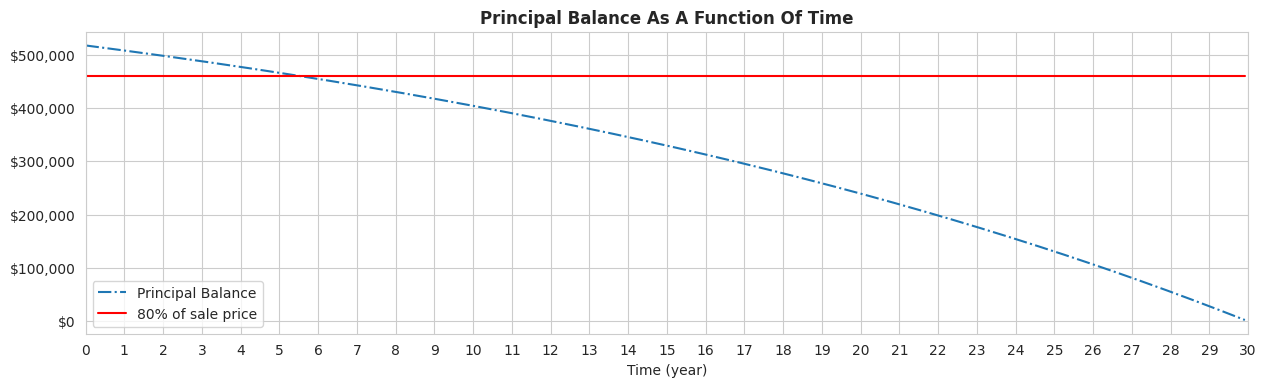

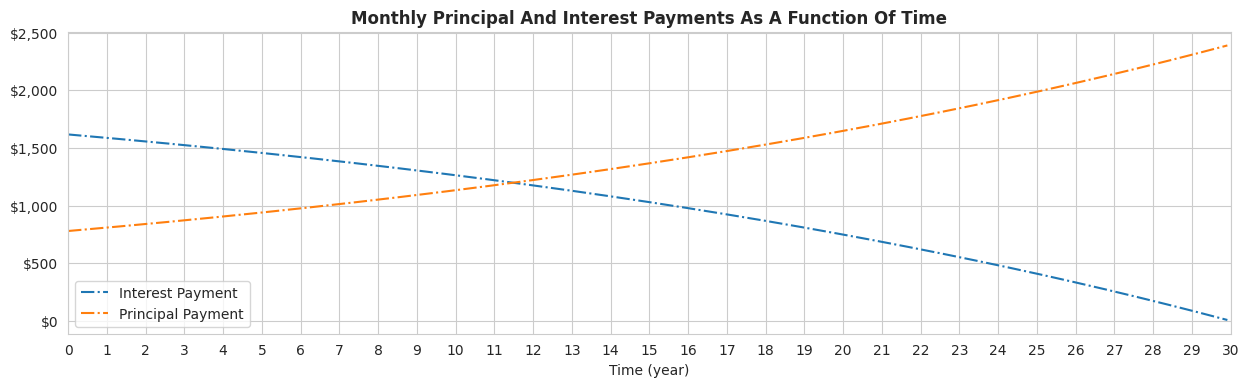

In [21]:
mortgage.plot()